# **Bellabeat Casestudy(R)- Google Capstone Project**

## **How Can a Wellness Technology Company Play It Smart?**

Introduction
Welcome to the Bellabeat data analysis case study! In this case study, you will perform many real-world tasks of a junior data
analyst. You will imagine you are working for Bellabeat, a high-tech manufacturer of health-focused products for women, and
meet different characters and team members. In order to answer the key business questions, you will follow the steps of the
data analysis process: ask, prepare, process, analyze, share, and act. Along the way, the Case Study Roadmap tables —
including guiding questions and key tasks — will help you stay on the right path.
By the end of this lesson, you will have a portfolio-ready case study. Download the packet and reference the details of this case
study anytime. Then, when you begin your job hunt, your case study will be a tangible way to demonstrate your knowledge and
skills to potential employers.

### **End-of-course project**


**The purpose** of this project is to demostrate knowledge of how to perform data analysis.

**The goal** is to analyze smart device data to gain insight into how consumers are using their smart devices.
<br/>

*This analysis has six phases:*

**Phase 1: Ask**
* This section defines clear objectives and questions to guide the data analysis process, ensuring alignment with business goals.

**Phase 2: Prepare**
* Cleans and structure the data, addressing any inconsistencies or missing elements to create a robust foundation for analysis.

**Phase 3: Process**
* Collects and organize relevant data, ensuring its accuracy and completeness for meaningful insights.

**Phase 4: Analyze**
* Employs exploratory analytical techniques to uncover patterns, trends, and insights within the prepared dataset.

**Phase 5: Share**
* Communicates the findings and insights effectively, using visualizations and narratives to convey the story within the data.

**Phase 6: Act**
* Implement strategic decisions based on the analysis, translating insights into actionable steps for business improvement and growth.

<br/>

#### **Phases**

##### **Phase 1: Ask**

**Bussiness task**

Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices.
* Identify trends in smart device usage.
* Analyze how could these trends apply to Bellabeat customers.
* Perform recommendations to help Bellabeat marketing team.

**Key Stakeholders**

* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting
data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy
learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help
Bellabeat achieve them.

##### **Phase 2: Prapare**

**Data Origin**

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

**Data Organization**

The data is organized in 18 .csv files, it seems to be well organized by daily, hourly, and minute-level details of physical activity, intensity of the activity, sleep patterns, and calories burned by unique User ID, so it makes easy to handle it.

**Bias, Credibility and Integrity**

The dataset is hosted in Kaggle wich is a credible and reliable source.
the files provide specific data according to its name and user ID which makes it reliable to use.

**Licensing and Privacy**

Kaggle is a open source and ths dataset has the CC0:Public Domain License, it means it can be free used and the User ID's cant be tracked back so it is impossible to reach the personal information of users that provided it.

**Limitations**

The biggest limitation is that the data is a littli bit old so it means that the rasults of this analysis may noy be as accurate as in a real life it may be spected, the secon limitation is the quantity of data that is available, tha data set is not large enough to have a low margin of error therefore conclusions should be taken very carefully.

In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ingca\AppData\Local\Temp\ipykernel_16844\300588888.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read CSV files into pandas DataFrames
daily_activity = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_intensities = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_calories = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
weight = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heart_rate = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
minute_sleep = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minute_intensity = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minute_calories = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minute_steps = pd.read_csv(
    "archive/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")



##### **Phase 3: Process**

In [3]:
#Formatting dataframes column names
daily_activity.columns = daily_activity.columns.str.lower()
daily_sleep.columns = daily_sleep.columns.str.lower()
hourly_intensities.columns = hourly_intensities.columns.str.lower()
hourly_calories.columns = hourly_calories.columns.str.lower()
hourly_steps.columns = hourly_steps.columns.str.lower()
heart_rate.columns = heart_rate.columns.str.lower()
weight.columns = weight.columns.str.lower()
minute_sleep.columns = minute_sleep.columns.str.lower()
minute_steps.columns = minute_steps.columns.str.lower()
minute_intensity.columns = minute_intensity.columns.str.lower()
minute_calories.columns = minute_calories.columns.str.lower()

In [4]:
# Combine all DataFrames into a dict
dataset = {
    'daily_activity': daily_activity,
    'daily_sleep': daily_sleep,
    'hourly_intensities': hourly_intensities,
    'hourly_steps': hourly_steps,
    'hourly_calories': hourly_calories,
    'weight': weight,
    'heart_rate': heart_rate,
    'minute_sleep': minute_sleep,
    'minute_intensity': minute_intensity,
    'minute_calories': minute_calories,
    'minute_steps': minute_steps
}


In [5]:
# Rename columns
daily_activity = daily_activity.rename(columns={'activitydate': 'date'})
daily_sleep = daily_sleep.rename(columns={'sleepday': 'date'})

In [6]:
# Convert date columns to appropriate datatypes
daily_activity['date'] = pd.to_datetime(
    daily_activity['date'], format="%m/%d/%Y")
daily_sleep['date'] = pd.to_datetime(
    daily_sleep['date'], format="%m/%d/%Y %I:%M:%S %p")
hourly_intensities['activityhour'] = pd.to_datetime(
    hourly_intensities['activityhour'], format="%m/%d/%Y %I:%M:%S %p")
hourly_calories['activity_hour'] = pd.to_datetime(
    hourly_calories['activityhour'], format="%m/%d/%Y %I:%M:%S %p")
hourly_steps['activityhour'] = pd.to_datetime(
    hourly_steps['activityhour'], format="%m/%d/%Y %I:%M:%S %p")
weight['date'] = pd.to_datetime(weight['date'], format="%m/%d/%Y %I:%M:%S %p")
minute_sleep['date'] = pd.to_datetime(
    minute_sleep['date'], format="%m/%d/%Y %I:%M:%S %p")
minute_calories['activityminute'] = pd.to_datetime(
    minute_calories['activityminute'], format="%m/%d/%Y %I:%M:%S %p")
minute_intensity['activityminute'] = pd.to_datetime(
    minute_intensity['activityminute'], format="%m/%d/%Y %I:%M:%S %p")
minute_steps['activityminute'] = pd.to_datetime(
    minute_steps['activityminute'], format="%m/%d/%Y %I:%M:%S %p")

In [7]:
# Handle heart_rate time column with try-except
try:
    heart_rate['time'] = pd.to_datetime(
        heart_rate['time'], format="%m/%d/%Y %I:%M:%S %p")
except ValueError:
    # Handle the case where conversion fails, you might want to log or handle it appropriately
    pass


for name, df in dataset.items():
    print(f"{name}, {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        940 non-null    int64  
 1   activitydate              940 non-null    object 
 2   totalsteps                940 non-null    int64  
 3   totaldistance             940 non-null    float64
 4   trackerdistance           940 non-null    float64
 5   loggedactivitiesdistance  940 non-null    float64
 6   veryactivedistance        940 non-null    float64
 7   moderatelyactivedistance  940 non-null    float64
 8   lightactivedistance       940 non-null    float64
 9   sedentaryactivedistance   940 non-null    float64
 10  veryactiveminutes         940 non-null    int64  
 11  fairlyactiveminutes       940 non-null    int64  
 12  lightlyactiveminutes      940 non-null    int64  
 13  sedentaryminutes          940 non-null    int64  
 14  calories  

In [8]:
# Change date formats
daily_activity['date'] = pd.to_datetime(
    daily_activity['date'], format='%m/%d/%Y')
daily_sleep['date'] = pd.to_datetime(
    daily_sleep['date'], format='%m/%d/%Y %I:%M:%S %p')
hourly_intensities['activityhour'] = pd.to_datetime(
    hourly_intensities['activityhour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_calories['activityhour'] = pd.to_datetime(
    hourly_calories['activityhour'], format='%m/%d/%Y %I:%M:%S %p')
hourly_steps['activityhour'] = pd.to_datetime(
    hourly_steps['activityhour'], format='%m/%d/%Y %I:%M:%S %p')
weight['date'] = pd.to_datetime(weight['date'], format='%m/%d/%Y %I:%M:%S %p')
minute_sleep['date'] = pd.to_datetime(
    minute_sleep['date'], format='%m/%d/%Y %I:%M:%S %p')
minute_calories['activityminute'] = pd.to_datetime(
    minute_calories['activityminute'], format='%m/%d/%Y %I:%M:%S %p')
minute_intensity['activityminute'] = pd.to_datetime(
    minute_intensity['activityminute'], format='%m/%d/%Y %I:%M:%S %p')
minute_steps['activityminute'] = pd.to_datetime(
    minute_steps['activityminute'], format='%m/%d/%Y %I:%M:%S %p')
heart_rate['time'] = pd.to_datetime(
    heart_rate['time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [9]:
# Checking for duplicates
print(daily_activity.duplicated().sum())
print(daily_sleep.duplicated().sum())
print(hourly_calories.duplicated().sum())
print(hourly_steps.duplicated().sum())
print(hourly_intensities.duplicated().sum())
print(heart_rate.duplicated().sum())
print(weight.duplicated().sum())

daily_sleep = daily_sleep.drop_duplicates()
print(daily_activity.duplicated().sum())

# checking for number of distinct IDs in each dataframe to analyze the sample size
print(daily_activity['id'].nunique())
print(daily_sleep['id'].nunique())
print(heart_rate['id'].nunique())
print(weight['id'].nunique())

0
3
0
0
0


0
0
0
33
24
14
8


##### **Phase 4 & 5: Analyze & Share**

In [10]:
# Usage Frequency
usage_frequency = (
    daily_activity[daily_activity['totalsteps'] != 0]
    .groupby('id')
    .agg(total_days_used=('id', 'size'))
    .assign(
        user_frequency=lambda x: np.select(
            [
                x['total_days_used'] >= 25,
                (x['total_days_used'] >= 15) & (x['total_days_used'] < 25),
                x['total_days_used'] < 14,
            ],
            ['regular', 'frequent', 'occasional'],
        )
    )
    .reset_index()  # Resetting index to make 'id' a column again
)

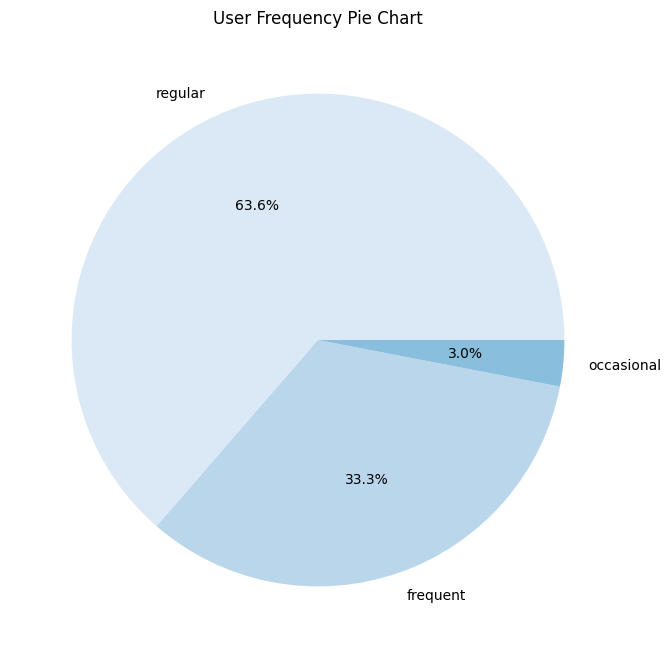

In [11]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    usage_frequency['user_frequency'].value_counts(),
    labels=usage_frequency['user_frequency'].value_counts().index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Blues'),
)
plt.title('User Frequency Pie Chart')
plt.show()

This pie chart shows that most of the users(21) are wearing fitness tracker for more than 25 days in a month, only 1 user is using his/her tracker occassionally.

In the dataset there are 4 available variables to track, so it is important to investigate how many variables are being tracked by each user, the number of days they are tracking the other variables and how this tracking behaviour varies across users of different categories.

In [12]:
# Add columns for tracking variables
usage_frequency['steps_tracked'] = usage_frequency['id'].isin(
    daily_activity['id']).astype(int)
usage_frequency['sleep_tracked'] = usage_frequency['id'].isin(
    daily_sleep['id']).astype(int)
usage_frequency['weight_tracked'] = usage_frequency['id'].isin(
    weight['id']).astype(int)
usage_frequency['heartrate_tracked'] = usage_frequency['id'].isin(
    heart_rate['id']).astype(int)

In [13]:
# Calculate total variables tracked by each user
usage_frequency['features_tracked'] = usage_frequency[[
    'steps_tracked', 'sleep_tracked', 'weight_tracked', 'heartrate_tracked']].sum(axis=1)

In [14]:
# # Number of days each user is tracking daily activity
usage_frequency = usage_frequency.merge(
    daily_activity[daily_activity['totalsteps'] != 0]
    .groupby('id')
    .size()
    .reset_index(name='step_days_tracked'),
    on='id',
    how='left'
)

In [15]:
# Number of days each user is tracking sleep data
usage_frequency = usage_frequency.merge(
    daily_sleep.groupby('id').size().reset_index(name='sleep_days_tracked'),
    on='id',
    how='left'
)

In [16]:
# Number of days each user is tracking weight data
usage_frequency = usage_frequency.merge(
    weight.groupby('id').size().reset_index(name='weight_days_tracked'),
    on='id',
    how='left'
)

In [17]:
heart_rate['time'] = heart_rate['time'].astype(str)

# # Number of days each user is tracking heart rate
heart_rate[['date', 'time']] = heart_rate['time'].str.split(expand=True)

In [18]:
# Perform left join
usage_frequency = usage_frequency.merge(
    heart_rate.groupby('id')['date'].nunique().reset_index(
        name='heartrate_days_tracked'),
    on='id',
    how='left'
)


c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

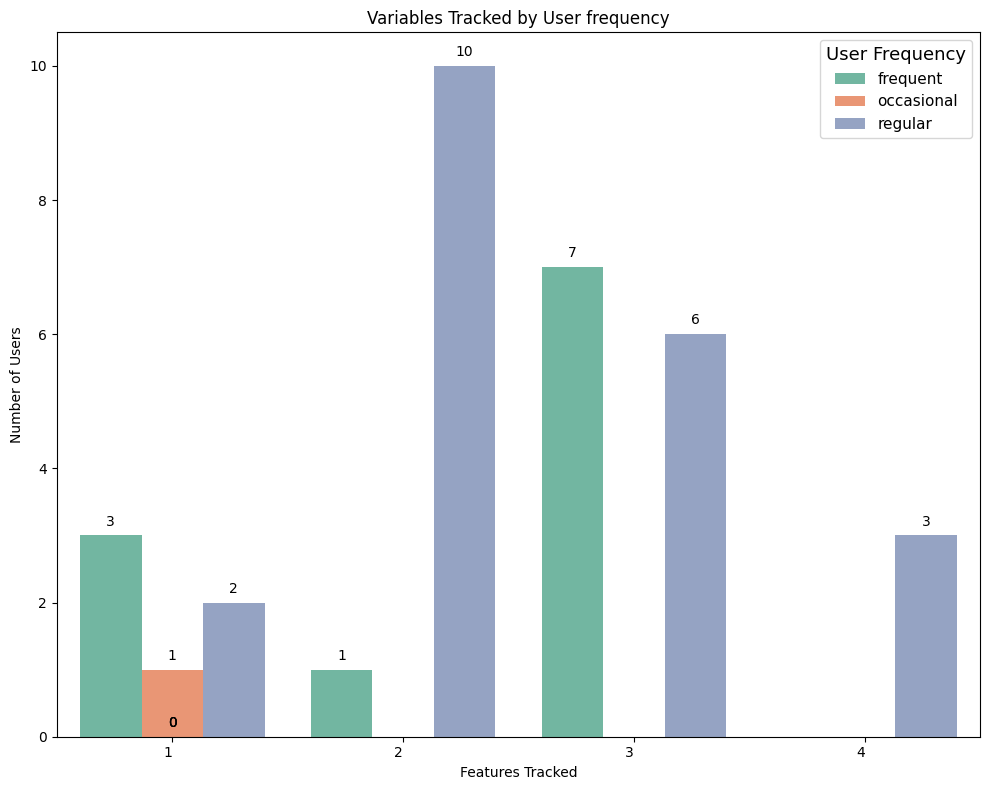

In [19]:
variables_counts = usage_frequency.groupby(
    ['features_tracked', 'user_frequency']).size().reset_index(name='users')

plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x='features_tracked', y='users',
                       hue='user_frequency', data=variables_counts, palette='Set2')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')
plt.xlabel('Features Tracked')
plt.ylabel('Number of Users')
plt.title('Variables Tracked by User frequency')
plt.legend(title="User Frequency", title_fontsize='13', fontsize='11')
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

The data indicates that individuals who consistently wear the device tend to track a higher number of variables. Specifically, only those who use the device regularly are observed to be tracking four variables. Among regular users, there are 10 individuals tracking two variables, 6 individuals tracking three variables, and only 2 individuals tracking one variable. Moreover, a significant portion of frequent users are seen to be tracking multiple variables, with the majority tracking three variables.

From these findings, we can infer that individuals who wear the device regularly or frequently are inclined to track a greater number of variables.

Encouraging users to track more variables could offer valuable insights into their health status and foster an understanding of how different variables impact or are impacted by their activities. This insight could motivate users to wear the device consistently. Therefore, expanding the number of variables tracked by Bellabeat fitness products could prove to be a beneficial strategy. Both regular and frequent users may be interested in purchasing products that track more variables.

c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ingca\AppData\Local\Programs\Python\Python311

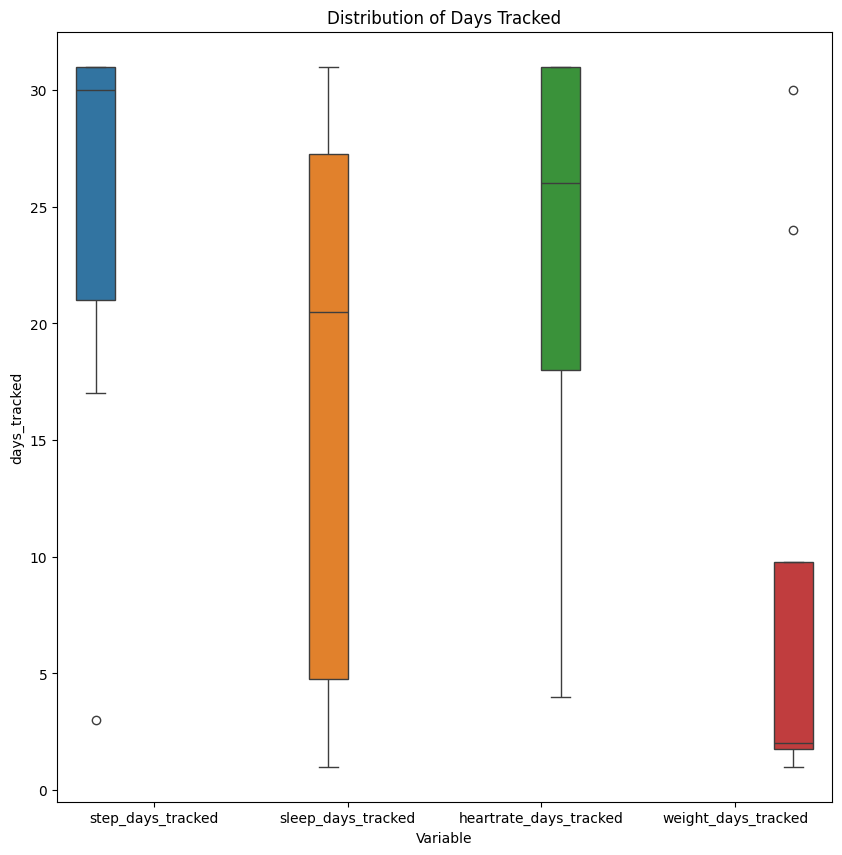

In [20]:
# Boxplot of the distribution of days each variable is tracked
days_tracked = usage_frequency[['id', 'step_days_tracked',
                                'sleep_days_tracked', 'heartrate_days_tracked', 'weight_days_tracked']]
days_tracked = pd.melt(days_tracked, id_vars=['id'], value_vars=['step_days_tracked', 'sleep_days_tracked',
                       'heartrate_days_tracked', 'weight_days_tracked'], var_name='feature', value_name='days_tracked')

plt.figure(figsize=(10, 10))
sns.boxplot(x='feature', y='days_tracked',
            data=days_tracked, hue='feature', dodge=True)
plt.title('Distribution of Days Tracked')
plt.xlabel('Variable')
plt.show()

The boxplot distributions represent the spread of days each variable is tracked by users. The median value, which indicates the middle value of the dataset, is highest for daily activity. This suggests that, on average, users are more consistent in tracking their daily activity compared to other variables.

For daily steps, half of the users track steps for more than 30 days, with the minimum number of days tracked being 17 (excluding outliers). This indicates a relatively high level of consistency among users in tracking their daily steps.

On the other hand, for sleep data, the median value suggests that half of the users track their sleep for more than 20 days. While this is lower than the median for daily activity, it still indicates a considerable amount of tracking. However, the wide distribution for sleep data suggests that users are not as consistent with tracking their sleep compared to daily steps.

Regarding heart rate, the median value suggests that half of the users track their heart rate for more than 26 days in a month. This indicates a moderate level of consistency among users in tracking their heart rate.

Lastly, it's noted that the low count of days for tracking weight makes sense, as it's unlikely that users would measure their weight daily.

Overall, the boxplot distributions provide valuable insights into the consistency of users in tracking different variables, with daily activity showing the highest level of consistency followed by heart rate, while sleep tracking appears to be less consistent among users.

**Activity Pattern**

To understand consumer activity patterns, users are categorized based on their average daily activity level. According to the Centers for Disease Control and Prevention (CDC), adults who take fewer than 5000 steps per day are considered sedentary, while those who take up to 10,000 steps per day are considered active. The benchmarks may vary depending on factors such as age, health, and fitness goals, but since our data lacks demographic information, these general benchmarks will be used to assign users to the following activity groups:

Less than 5000 steps a day: "Sedentary"
5000 to 7499 steps a day: "Lightly Active"
7500 to 10000 steps a day: "Moderately Active"
More than 10,000 steps a day: "Very Active"
It's assumed that a reading of 0 steps indicates that the user did not wear the device on that day, as even minimal activity should register some steps. Therefore, records showing 0 steps will be eliminated to calculate a more representative daily average activity for each user.

In [21]:
filtered_activity = daily_activity[daily_activity['totalsteps'] != 0]

# Group by id and calculate the average daily steps
activity_status = filtered_activity.groupby('id').agg(
    avg_daily_steps=('totalsteps', 'mean')).reset_index()

In [22]:
# Define a function to determine user type based on avg_daily_steps


def determine_user_type(avg_daily_steps):
    if avg_daily_steps < 5000:
        return "sedentary"
    elif 5000 <= avg_daily_steps < 7500:
        return "lightly active"
    elif 7500 <= avg_daily_steps < 10000:
        return "moderately active"
    else:
        return "very active"

In [23]:
# Apply the function to create the user_type column
activity_status['user_type'] = activity_status['avg_daily_steps'].apply(
    determine_user_type)


In [24]:
# Convert user_type to categorical and specify order of levels
activity_status['user_type'] = pd.Categorical(activity_status['user_type'], categories=[
                                              "sedentary", "lightly active", "moderately active", "very active"], ordered=True)

In [25]:
# Sort by avg_daily_steps in descending order
sorted_data = activity_status.sort_values('avg_daily_steps', ascending=False)

In [26]:
# Create a sorted list of unique ids
sorted_ids = sorted_data['id'].unique()

In [27]:
# Create a categorical type with the sorted ids
activity_status['id'] = pd.Categorical(
    activity_status['id'], categories=sorted_ids, ordered=True)

c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

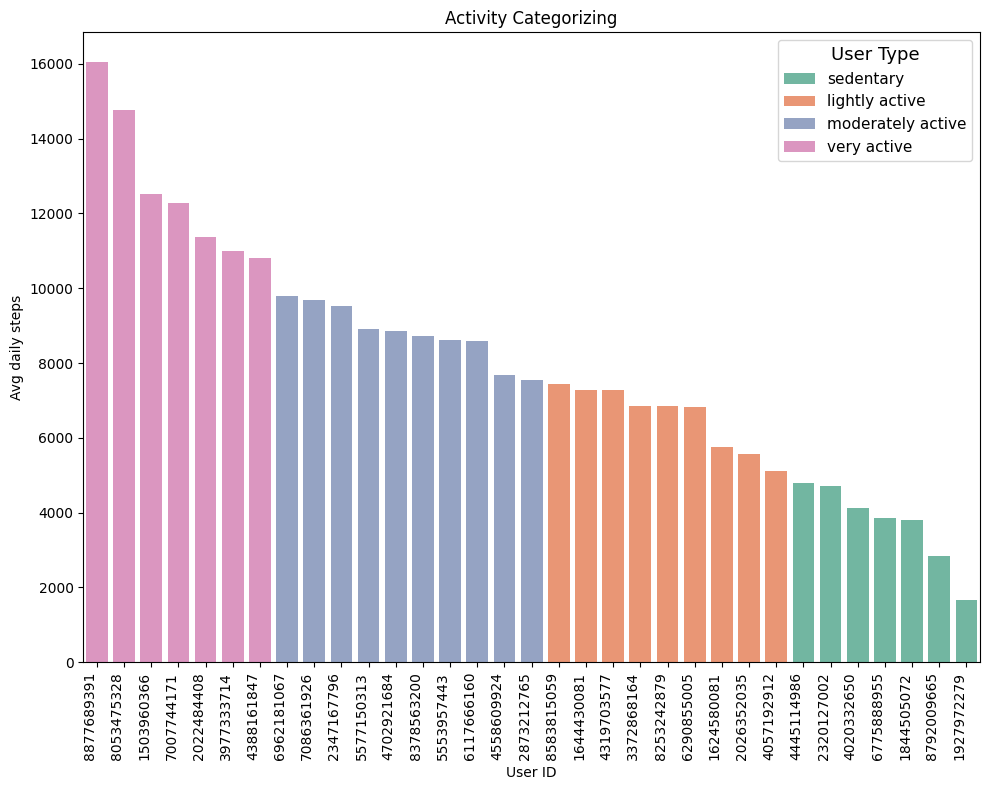

In [28]:
# Now plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='id', y='avg_daily_steps', hue='user_type',
            data=activity_status, palette='Set2')
plt.xlabel('User ID')
plt.ylabel('Avg daily steps')
plt.title('Activity Categorizing')
plt.legend(title="User Type", title_fontsize='13', fontsize='11')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


The analysis of the average daily activity of all 33 users reveals that the majority of Fitbit users are either lightly or moderately active, with a substantial number being highly active and exceeding 10,000 steps per day. However, there are also some users who are sedentary and not achieving the minimum of 5000 steps per day.

Different strategies are required to engage and motivate users with varying activity levels:

1. Sedentary Users: These users, identified as those below the red dashed line who fail to achieve an average of 5000 steps a day, may have full-time desk jobs and spend a significant amount of time sitting. To target them, more push notifications regarding the health consequences of being sedentary could be sent. They could also be motivated to set small, incremental goals to improve their step count each week.

2. Active Under Average: This group consists of users who are not sedentary but have below-average activity levels (as shown under the dotted blue line). They could be engaged further by offering multiple activity goals to help them improve their activity levels even further, and congratulating them on achieving their targets.

3. High Active Users: These users, identified as those above the blue dotted line, are already very active. The goal for this group should be to maintain their motivation and activity levels. They could be allocated badges of active users on their profile, such as "Energetic Achiever," which are visible to other users and shareable on social media platforms. This recognition can serve as positive reinforcement and further motivate them to continue their active lifestyle.

By implementing targeted strategies for each user group based on their activity levels, Fitbit can effectively engage and motivate users to maintain or improve their physical activity levels.

**Correlation between Usage Status and Activity Pattern**

In [29]:
activity_subset = activity_status[['id', 'user_type']]

# Inner joining activity_subset with usage_pattern DataFrame on 'id'
joined_data = pd.merge(activity_subset, usage_frequency[[
                       'id', 'user_frequency']], on='id')

In [30]:
# Counting occurrences of each combination of 'usage' and 'user_type'
count_data = joined_data.groupby(
    ['user_frequency', 'user_type']).size().reset_index(name='count')

C:\Users\ingca\AppData\Local\Temp\ipykernel_16844\244410485.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = joined_data.groupby(


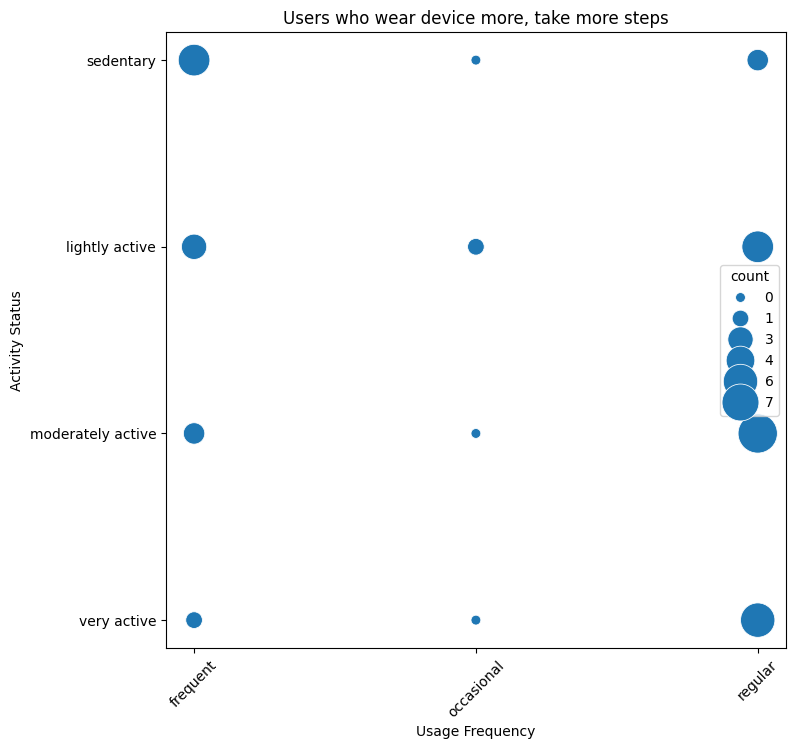

In [31]:
# Plotting the data
plt.figure(figsize=(8, 8))
sns.scatterplot(data=count_data, x='user_frequency',
                y='user_type', size='count', sizes=(50, 800))
plt.title('Users who wear device more, take more steps')
plt.xlabel('Usage Frequency')
plt.ylabel('Activity Status')
plt.xticks(rotation=45)
plt.show()

The analysis of usage pattern and activity pattern highlights a clear trend: users who wear the device regularly, defined as wearing it for more than 25 days a week, not only tend to track more variables but also take more steps. The correlation between usage pattern and activity pattern visually demonstrates this trend, showing that regular users are more active than frequent and occasional users.

Increasing the usage of the device holds the key to increasing both the number of tracking variables and the number of active steps. To achieve this, several strategies can be implemented:

Offer rewards or incentives for users who consistently wear the fitness device. This could include discounts on fitness-related products, gift cards, or exclusive access to premium features. By providing tangible benefits, users are motivated to wear the device regularly.

Create healthy competition and challenges for step count, active minutes, and other fitness metrics. By engaging users in friendly competitions and providing feedback on their progress, motivation to increase device usage and physical activity levels can be fostered.

Reach out to users with low usage rates to understand the barriers preventing them from regularly wearing the device. By gathering feedback and offering personalized solutions, barriers can be addressed, and users can be encouraged to increase their device usage.

Share educational content and tips on the benefits of consistent device usage. Users who understand how the device contributes to their health and fitness are more likely to wear it regularly. By providing valuable information, users can be empowered to make informed decisions about their health and wellness.

By implementing these strategies, the usage of the device can be increased, leading to improved tracking of variables and increased physical activity levels among users. This ultimately contributes to better health outcomes and overall user satisfaction.

In [32]:
# Inner join daily_activity with activity_status on 'id'
daily_activity_user_type = pd.merge(
    daily_activity, activity_status[['id', 'user_type']], on='id')

In [33]:
# Reordering columns with user_type after 'id'
daily_activity_user_type = daily_activity_user_type.reindex(
    columns=['user_type'] + [col for col in daily_activity_user_type.columns if col != 'user_type'])

In [34]:
# Displaying the resulting DataFrame
print(daily_activity_user_type)

       user_type          id       date  totalsteps  totaldistance  \
0    very active  1503960366 2016-04-12       13162       8.500000   
1    very active  1503960366 2016-04-13       10735       6.970000   
2    very active  1503960366 2016-04-14       10460       6.740000   
3    very active  1503960366 2016-04-15        9762       6.280000   
4    very active  1503960366 2016-04-16       12669       8.160000   
..           ...         ...        ...         ...            ...   
935  very active  8877689391 2016-05-08       10686       8.110000   
936  very active  8877689391 2016-05-09       20226      18.250000   
937  very active  8877689391 2016-05-10       10733       8.150000   
938  very active  8877689391 2016-05-11       21420      19.559999   
939  very active  8877689391 2016-05-12        8064       6.120000   

     trackerdistance  loggedactivitiesdistance  veryactivedistance  \
0           8.500000                       0.0                1.88   
1           6.97000

In [35]:
#Resetting columns order
columns_order = ['id', 'user_type', 'date', 'totalsteps', 'totaldistance',
                 'trackerdistance', 'loggedactivitiesdistance', 'veryactivedistance',
                 'moderatelyactivedistance', 'lightactivedistance',
                 'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
                 'lightlyactiveminutes', 'sedentaryminutes', 'calories']
daily_activity_user_type = daily_activity_user_type[columns_order]

In [36]:
#definning finctions for histogram and scatter plot
def plot_histogram_density(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, stat="density",
                 color="white", edgecolor="black")
    sns.kdeplot(data, color="red", alpha=0.4)
    plt.axvline(data.mean(), color='blue', linestyle='--', linewidth=1)
    plt.text(data.mean() + 500, 0.00075,
             f"Mean = {round(data.mean(), 2)}", color='blue', size=12)
    plt.title(title)
    plt.xlabel("Calories")
    plt.ylabel("Density")
    plt.show()


def plot_scatter_smooth(data, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='totalsteps', y='calories', data=data)
    sns.regplot(x='totalsteps', y='calories', data=data, scatter=False)
    plt.title(title)
    plt.xlabel("Total Steps")
    plt.ylabel("Calories")
    plt.show()

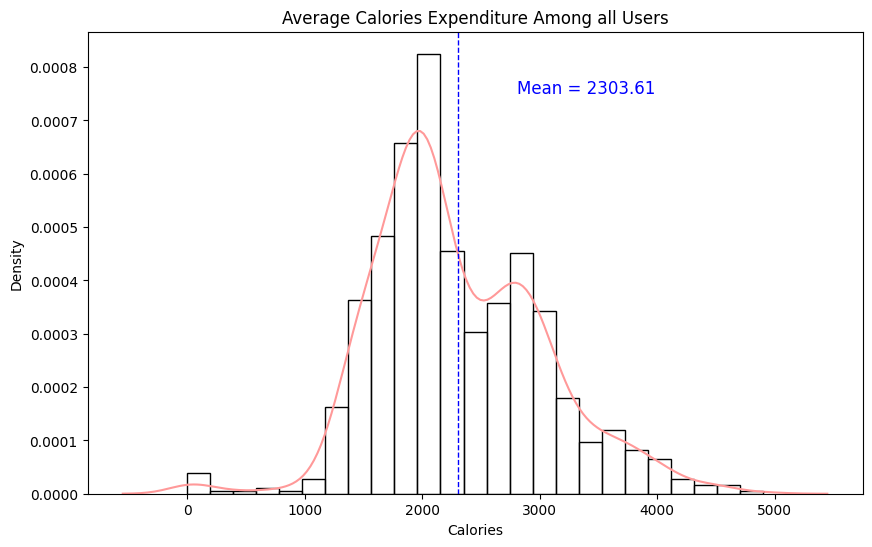

In [37]:
# Plotting histogram
plot_histogram_density(
    daily_activity_user_type['calories'], "Average Calories Expenditure Among all Users")

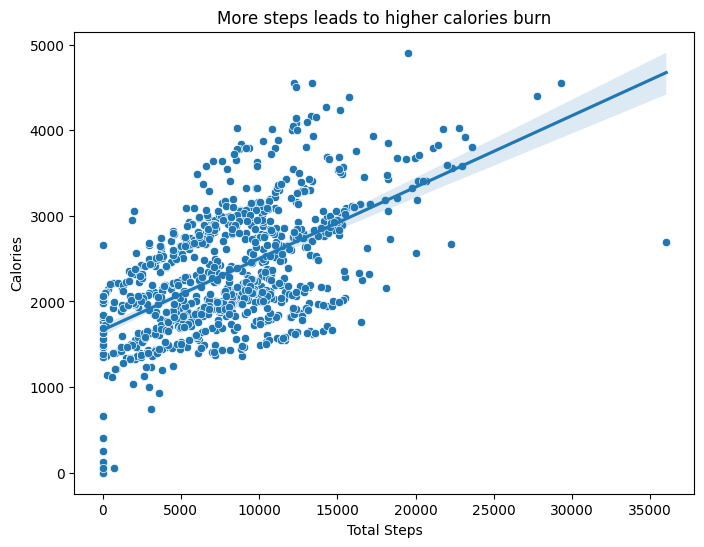

In [38]:
#plotting scatterplot
plot_scatter_smooth(daily_activity_user_type,
                    "More steps leads to higher calories burn")

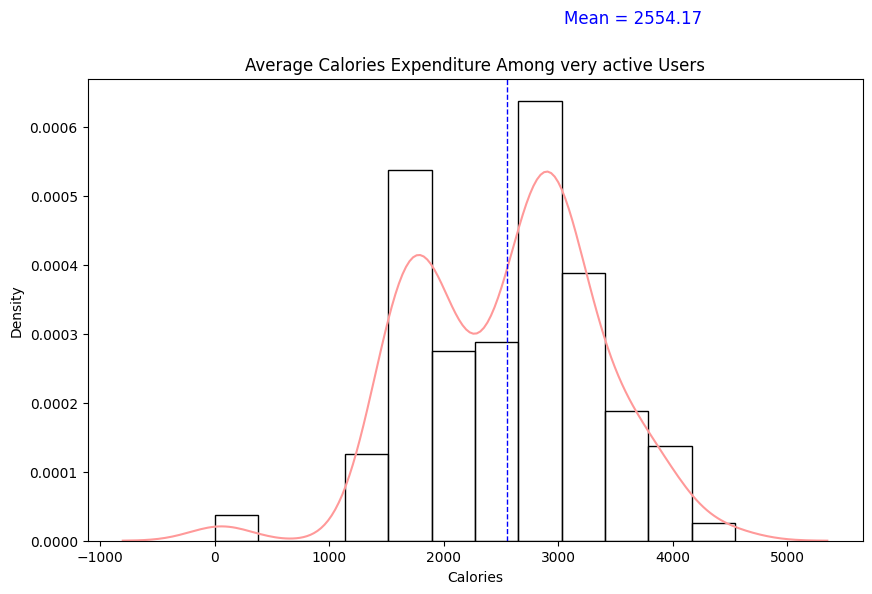

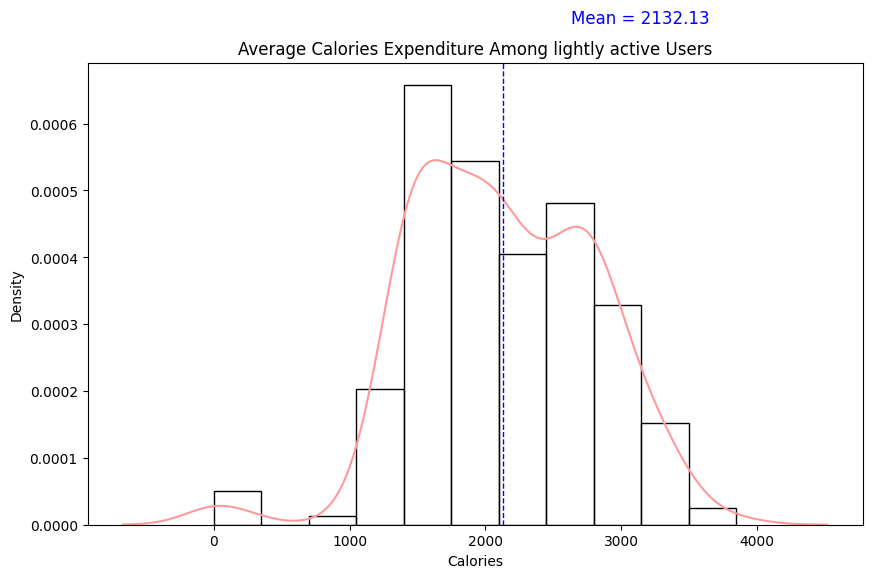

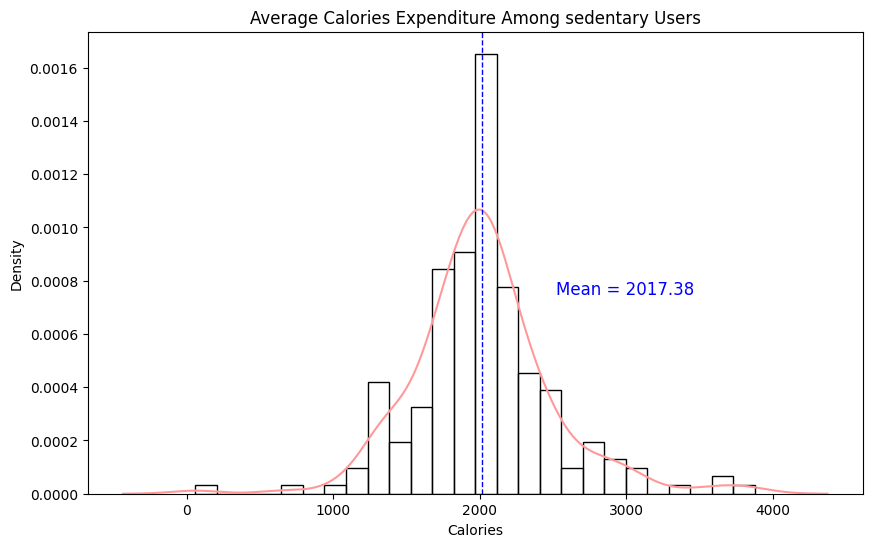

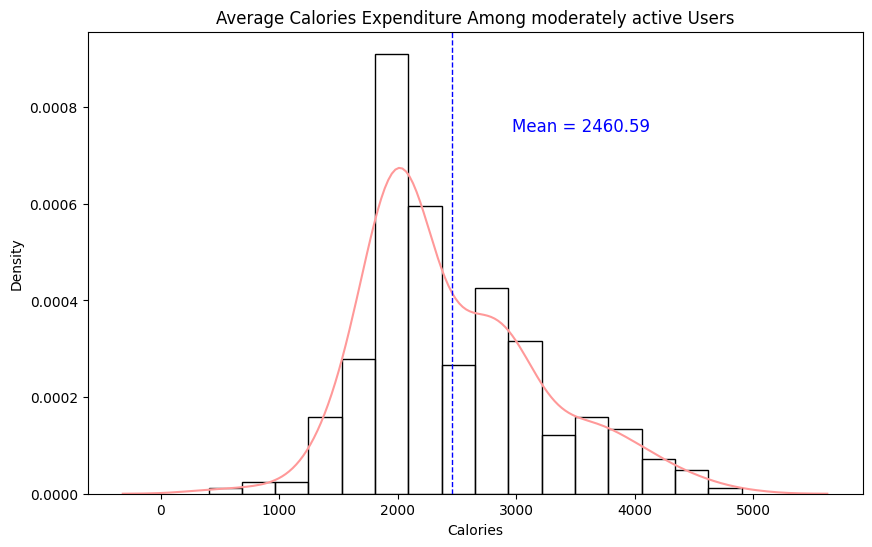

In [39]:
for user_type in daily_activity_user_type['user_type'].unique():
    subset_data = daily_activity_user_type[daily_activity_user_type['user_type'] == user_type]
    plot_histogram_density(
        subset_data['calories'], f"Average Calories Expenditure Among {user_type} Users")

hourly_combined = pd.merge(hourly_steps, hourly_intensities, on=[
                           'id', 'activityhour'])
hourly_combined = pd.merge(hourly_combined, hourly_calories, on=[
                           'id', 'activityhour'])

In [40]:
# Convert hour to string
hourly_combined['hour'] = hourly_combined['activityhour'].dt.hour.astype(str)

In [41]:
# Group by hour and calculate mean hourly steps
mean_hourly_steps = hourly_combined.groupby(
    'hour')['steptotal'].mean().reset_index()

c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWa

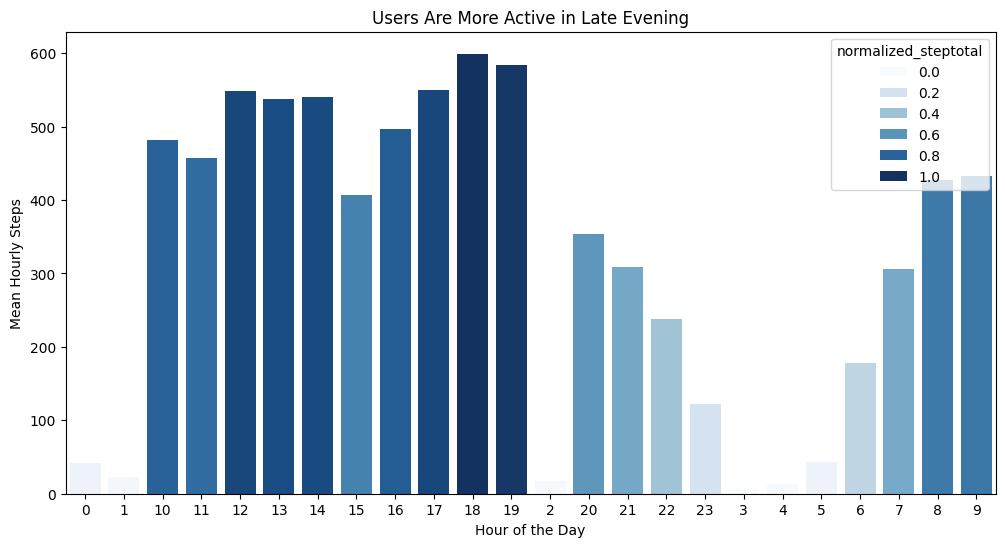

In [72]:
mean_hourly_steps['normalized_steptotal'] = (mean_hourly_steps['steptotal'] - mean_hourly_steps['steptotal'].min()) / \
                                         (mean_hourly_steps['steptotal'].max() - mean_hourly_steps['steptotal'].min())

# Create the plot with custom colormap
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='steptotal', data=mean_hourly_steps, hue='normalized_steptotal',
            palette='Blues', hue_norm=plt.Normalize(0, 1))  # Specify cmap for gradient
plt.title("Users Are More Active in Late Evening")
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Hourly Steps")
plt.show()


The visual report indicates a higher activity level among users in the afternoon and late evening, with the highest activity level reported in the late evening. This suggests that the majority of users are exercising during the evening hours.

Based on this data, implementing activity reminders tailored to individual users' preferred activity times could be an effective strategy for engagement. Personalization is key in this approach. While the graph displays an accumulated average time for all users, it's important to recognize that activity timing may vary from one individual to another.

Sending personalized reminders to each user based on their preferred activity time can enhance engagement and motivation. By leveraging user data and preferences, reminders can be timed to coincide with when users are most likely to engage in physical activity, increasing the likelihood of participation.

Ultimately, by incorporating personalized reminders into the user experience, fitness devices can better support users in achieving their activity goals and maintaining a consistent exercise routine.

In [53]:
w1 = daily_activity_user_type.copy()
w1['weekday'] = pd.Categorical(w1['date'].dt.strftime('%A'), categories=[
                               "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
w1 = w1.groupby('weekday')['totalsteps'].mean().reset_index()

C:\Users\ingca\AppData\Local\Temp\ipykernel_16844\4224588617.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w1 = w1.groupby('weekday')['totalsteps'].mean().reset_index()


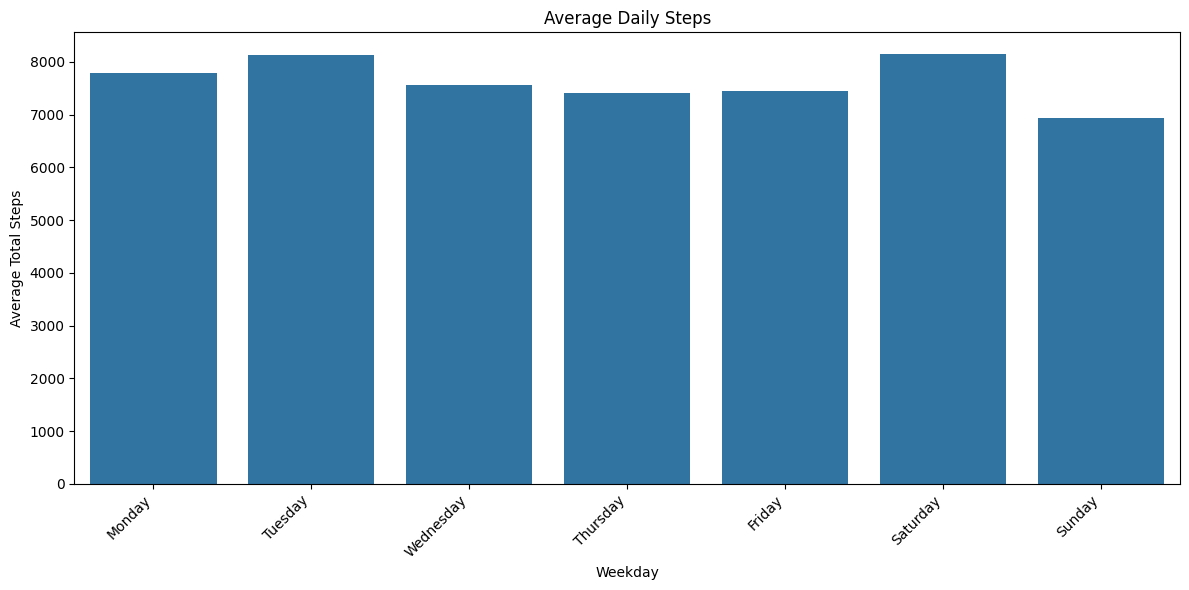

In [54]:
# Plotting w1
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='totalsteps', data=w1)
plt.title("Average Daily Steps")
plt.xlabel("Weekday")
plt.ylabel("Average Total Steps")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [55]:
# Calculate mean daily very active minutes by weekday
w2 = daily_activity_user_type.copy()
w2['weekday'] = pd.Categorical(w2['date'].dt.strftime('%A'), categories=[
                               "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
w2 = w2.groupby('weekday')['veryactiveminutes'].mean().reset_index()

C:\Users\ingca\AppData\Local\Temp\ipykernel_16844\3657864604.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w2 = w2.groupby('weekday')['veryactiveminutes'].mean().reset_index()


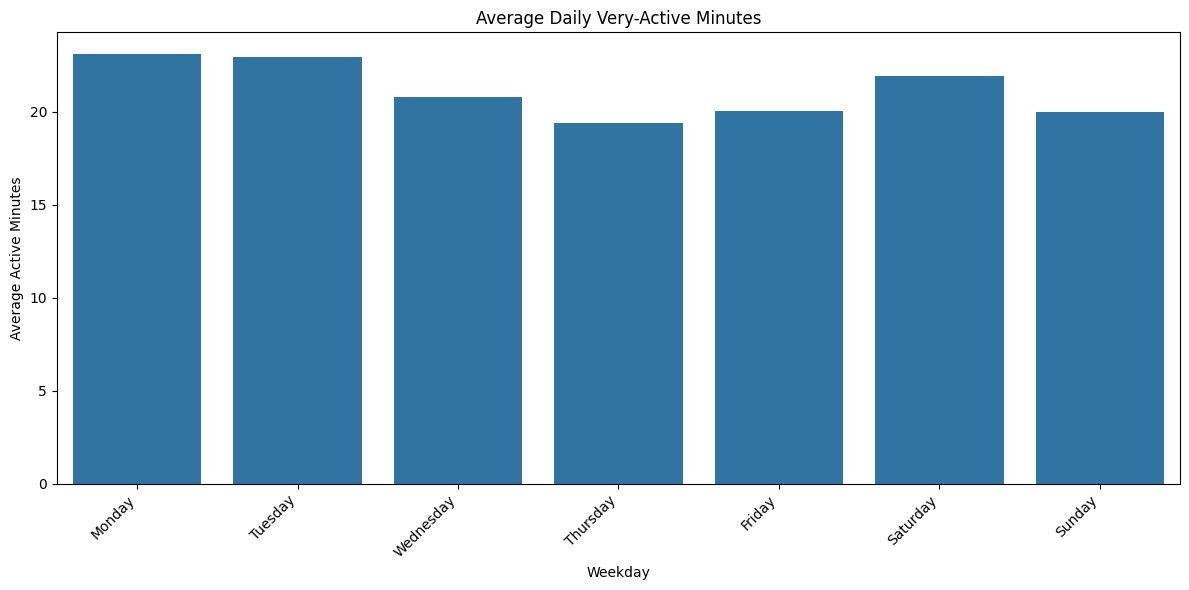

In [56]:
# Plotting w2
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='veryactiveminutes', data=w2)
plt.title("Average Daily Very-Active Minutes")
plt.xlabel("Weekday")
plt.ylabel("Average Active Minutes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
# Calculate mean daily steps by user type and weekday
w3 = daily_activity_user_type.copy()
w3['weekday'] = pd.Categorical(w3['date'].dt.strftime('%A'), categories=[
                               "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
w3 = w3.groupby(['user_type', 'weekday'])['totalsteps'].mean().reset_index()

C:\Users\ingca\AppData\Local\Temp\ipykernel_16844\1948511611.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  w3 = w3.groupby(['user_type', 'weekday'])['totalsteps'].mean().reset_index()


c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWa

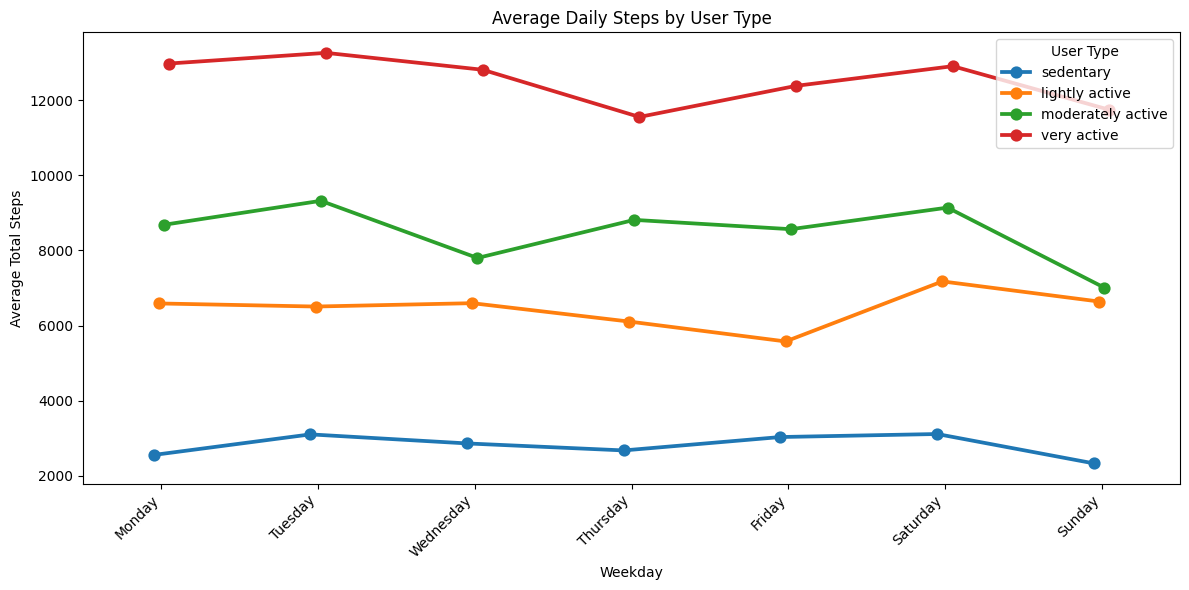

In [58]:
# Plotting w3
plt.figure(figsize=(12, 6))
sns.pointplot(x='weekday', y='totalsteps',
              hue='user_type', data=w3, dodge=True)
plt.title("Average Daily Steps by User Type")
plt.xlabel("Weekday")
plt.ylabel("Average Total Steps")
plt.legend(title="User Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sleep Patterns

When are users going to bed?

In [59]:
minute_sleep_grouped = minute_sleep.groupby(
    ['id', 'logid']).first().reset_index()

In [60]:
# Calculate bed_time and bed_time1
minute_sleep_grouped['bed_time'] = pd.to_datetime(
    minute_sleep_grouped['date']).dt.round('H').dt.hour
minute_sleep_grouped['bed_time1'] = minute_sleep_grouped['bed_time'].apply(
    lambda x: 24 if x == 0 else x)

C:\Users\ingca\AppData\Local\Temp\ipykernel_16844\913043912.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  minute_sleep_grouped['date']).dt.round('H').dt.hour


In [61]:
# Count the occurrences of each bed_time1
bed_time_counts = minute_sleep_grouped['bed_time1'].value_counts().sort_index()

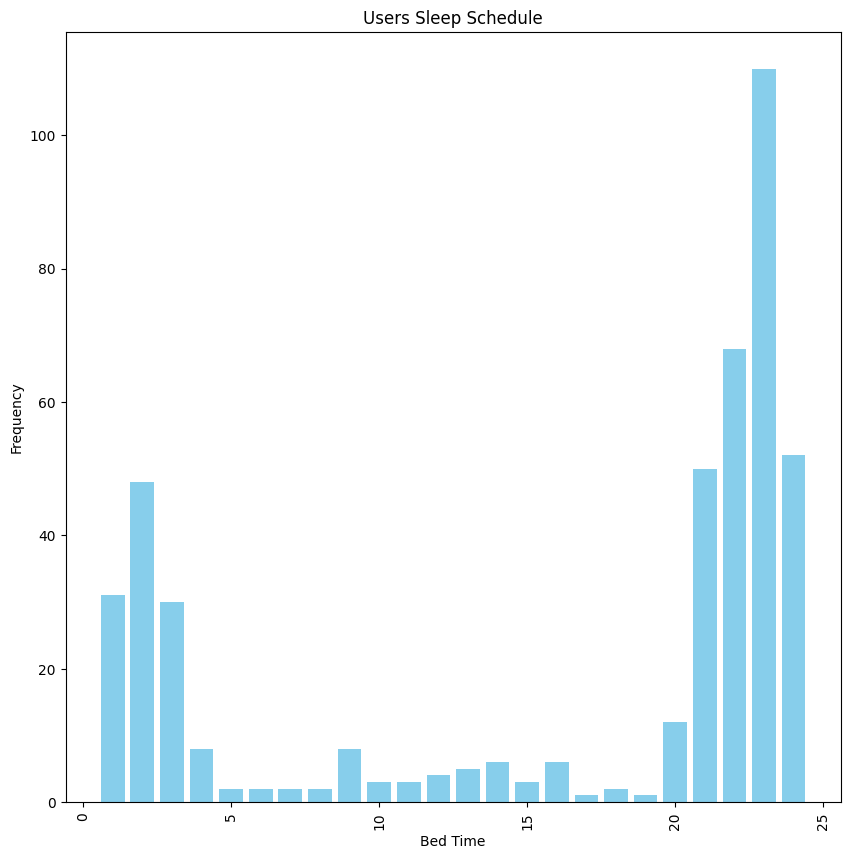

In [62]:
# Plotting
plt.figure(figsize=(10, 10))
plt.bar(bed_time_counts.index, bed_time_counts.values, color='skyblue')
plt.title("Users Sleep Schedule")
plt.xlabel("Bed Time")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

The analysis of users' bedtime patterns reveals that the majority of users are going to sleep between 9 PM to 11 PM, with some users going to bed after this time. This bedtime routine data can be leveraged to send bedtime reminders to users and provide relaxation exercises for better sleep quality, ideally around half an hour before their bedtime.

Additionally, the consistency in bedtime can be analyzed to determine how deviations from an individual's average bedtime may impact their health factors. However, due to the small sample size of the dataset, this analysis may not yield significant results. Despite this limitation, notifying users about the importance of a consistent bedtime routine and its impact on health can still provide value-added service.

By educating users about the importance of maintaining a regular bedtime schedule and providing tools and resources to support healthy sleep habits, fitness apps can contribute to overall well-being and help users achieve better sleep quality.

**Are Users Sleeping Enough?**

To investigate whether users are getting enough sleep, I have visualized the sleep duration for each of the four types of users: sedentary, lightly active, moderately active, and very active. The visualization likely shows the distribution of sleep hours for each user type, allowing for a comparison of sleep duration among the different groups.

By examining the visualized data, we can determine if there are differences in sleep duration among the user types and assess whether users in any particular group are consistently meeting the recommended minimum of 7 hours of sleep per night, as advised by the Centers for Disease Control and Prevention (CDC).

In [63]:
mean_sleep = daily_sleep.groupby(
    'id')['totalminutesasleep'].mean().reset_index()
mean_sleep.columns = ['id', 'mean_sleeping_hours']

In [64]:
# Merge with 'activity_status' on 'id'
merged_data = pd.merge(
    mean_sleep, activity_status[['id', 'user_type']], on='id')

c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  try:
c:\Users\ingca\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWa

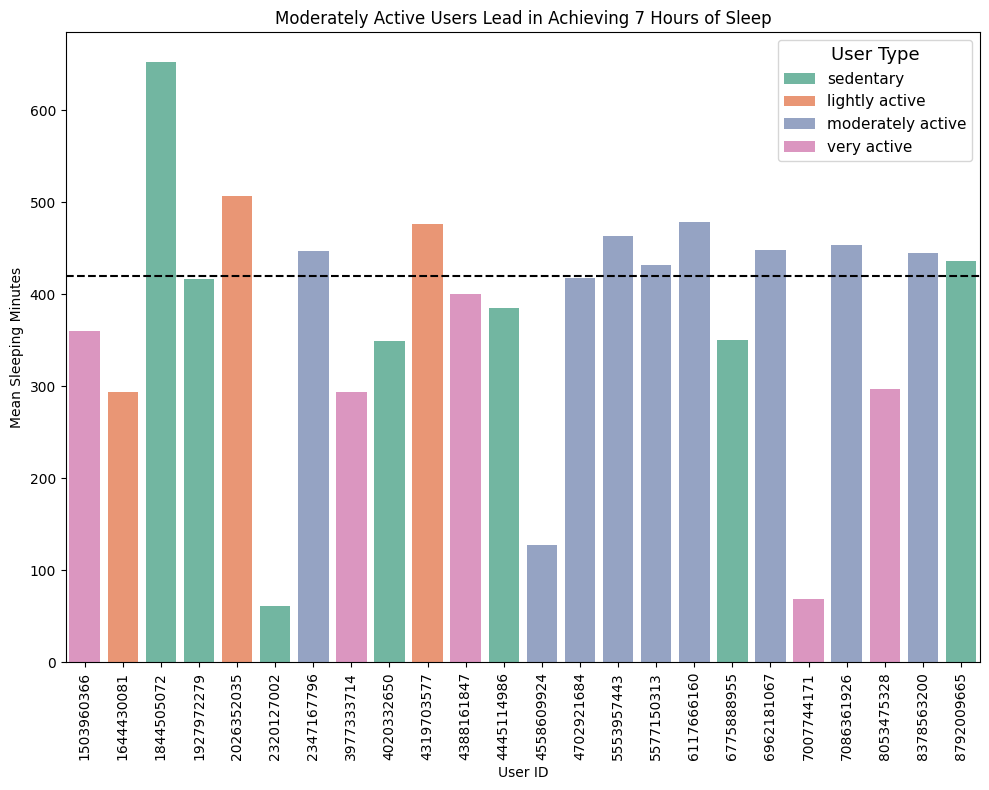

In [65]:
# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x='id', y='mean_sleeping_hours', hue='user_type',
            data=merged_data, palette='Set2')
plt.axhline(y=420, linestyle='--', color='black')
plt.xlabel('User ID')
plt.ylabel('Mean Sleeping Minutes')
plt.title('Moderately Active Users Lead in Achieving 7 Hours of Sleep')
plt.legend(title="User Type", title_fontsize='13', fontsize='11')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The results of the analysis are indeed surprising. It appears that the majority of moderately active users are achieving an average of 7 hours of sleep, while sedentary and very active users are mostly below this recommended limit. The poor sleep quality among sedentary users may be an expected outcome due to their inactive lifestyle. However, the question arises: what could be contributing to the sleep issues among very active users?

One potential factor could be the timing of vigorous activity. Research suggests that while exercise generally improves sleep quality, engaging in vigorous physical activity in the evening or close to bedtime may actually hinder sleep onset. Moderate physical exercise in the evening, on the other hand, has been shown to enhance sleep quality (Alnawwar et al., 2023). However, it's important to acknowledge the limitation of the study, which is the small sample size. With less than 10 users in each category, the findings may lack generalizability, and a larger sample size could provide more accurate results.

Overall, excluding the moderately active users, a significant portion of the user population appears to have troubling sleep data. Recommending relaxing and aerobic exercises to those experiencing sleep issues, along with educating them on sleep hygiene practices such as creating a conducive sleep environment, maintaining a consistent sleep schedule, and avoiding stimulating activities close to bedtime, could be a valuable feature for promoting better sleep habits and overall well-being.

Note: The smaller bars on the plots may represent daytime naps, as not all users may be tracking nighttime sleep exclusively.

In [66]:
# Group data by user_type and calculate mean minutes for each intensity
activity_intensity = daily_activity_user_type.groupby('user_type').agg(
    very_active_minutes=('veryactiveminutes', 'mean'),
    mod_active_minutes=('fairlyactiveminutes', 'mean'),
    light_active_minutes=('lightlyactiveminutes', 'mean'),
    sedentary_minutes=('sedentaryminutes', 'mean')
).reset_index()

C:\Users\ingca\AppData\Local\Temp\ipykernel_16844\2405346317.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_intensity = daily_activity_user_type.groupby('user_type').agg(


In [67]:
# Reshape data for plotting
activity_intensity_long = activity_intensity.melt(
    id_vars=['user_type'], var_name='intensity', value_name='avg_minutes')

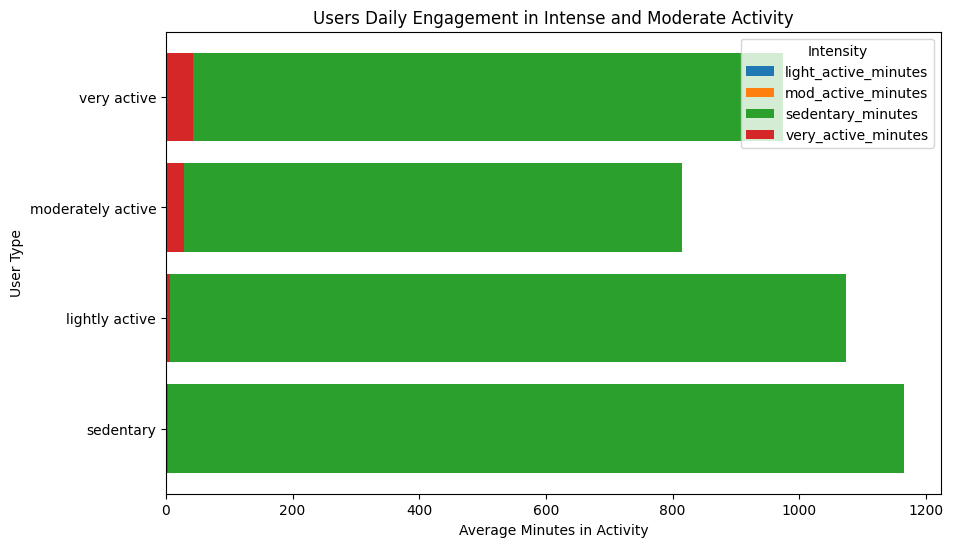

In [68]:
# Plotting
plt.figure(figsize=(10, 6))
for intensity, data in activity_intensity_long.groupby('intensity'):
    plt.barh(data['user_type'], data['avg_minutes'], label=intensity)

# Add labels and legend
plt.title("Users Daily Engagement in Intense and Moderate Activity")
plt.xlabel("Average Minutes in Activity")
plt.ylabel("User Type")
plt.legend(title="Intensity")
plt.show()



The graph depicting the average time each user spends asleep, restless, and awake during their time in bed reveals interesting patterns among different user categories.

Moderate and very active users generally exhibit longer periods of sleep and are less restless and awake during their sleep compared to sedentary users. This suggests that engaging in regular physical activity may contribute to improved sleep quality and efficiency.

However, it's worth noting that there is one very active user who appears to be quite restless during sleep, indicating that individual differences may play a significant role in sleep patterns and quality.

In contrast, sedentary users tend to have more instances of restlessness and wakefulness during their time in bed. This could be attributed to various factors such as a sedentary lifestyle, poor sleep habits, or underlying health conditions.

Overall, the data suggests that regular physical activity, as seen in moderate and very active users, may positively influence sleep quality by promoting longer periods of uninterrupted sleep and reducing restlessness and wakefulness during the night. However, individual variability must be considered, as factors beyond activity level may also impact sleep patterns.

##### **Phase 6: Act**


Based on the analysis of user activity patterns, device usage, and sleep data, several conclusions and actionable insights can be drawn:

1. Correlation between Device Usage and Activity Level: There appears to be a positive correlation between regular device usage and higher activity levels. Users who wear the device more consistently tend to track more variables and engage in more physical activity. This suggests that encouraging regular device usage could lead to increased physical activity among users.

2. Impact of Physical Activity on Sleep Quality: Moderate and very active users generally exhibit better sleep quality, with longer periods of uninterrupted sleep and fewer instances of restlessness and wakefulness during the night. This highlights the importance of regular physical activity in promoting better sleep health.

3. Need for Personalized Interventions: Personalized interventions, such as targeted reminders and incentives based on individual activity patterns and preferences, can be effective in promoting device usage and physical activity. Additionally, providing personalized sleep-related recommendations, such as relaxation exercises and sleep hygiene practices, could help improve sleep quality among users.

4. Consideration of Individual Variability: It's important to recognize that individual differences exist within user populations, and one-size-fits-all approaches may not be effective. Tailoring interventions and recommendations to individual needs and preferences can lead to better engagement and outcomes.

To apply these insights, the team and business could consider the following actions:

1. Enhance User Engagement Strategies: Develop targeted messaging and incentives to encourage regular device usage and physical activity, taking into account individual preferences and behavior patterns.
2. Integrate Sleep-related Features: Incorporate sleep tracking capabilities into the device and app, along with personalized sleep recommendations and interventions to promote better sleep habits.
3. Continuous Monitoring and Feedback: Implement mechanisms to monitor user engagement and activity levels over time and provide personalized feedback and guidance to support behavior change.
4. Collaboration with Health Professionals: Partner with healthcare providers to offer personalized health coaching and support services, leveraging the data collected by the device to inform tailored interventions and recommendations.

By leveraging these insights and implementing targeted strategies, the team and business can effectively promote healthy behaviors, enhance user engagement, and ultimately improve the overall health and well-being of their user base.